In [1]:
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop, SGD

from keras_lropt.callbacks import LRFinder
from utils import reset_weights

Using TensorFlow backend.


# Load and pre-process dataset

In [2]:
batch_size = 128
num_classes = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072).astype('float32') / 255
x_test = x_test.reshape(10000, 3072).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"x_train.shape: {x_train.shape}")
print(f"x_test.shape: {x_test.shape}")

x_train.shape: (50000, 3072)
x_test.shape: (10000, 3072)


# Create model

In [4]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

# Find max learning rate

Epoch 1/1
50000/50000 [==============================] - 48s 970us/step - loss: 2.3978 - acc: 0.1298


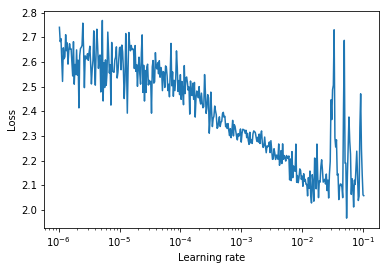

In [5]:
lrfinder = LRFinder(steps_per_epoch=x_train.shape[0]//batch_size)
hist = model.fit(x_train, y_train, epochs=1, batch_size=batch_size, callbacks=[lrfinder])

# Train with max learning rate

In [6]:
reset_weights(model)

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=1e-2),
              metrics=['accuracy'])

In [7]:
hist = model.fit(x_train, y_train, epochs=3, batch_size=batch_size, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 39s 781us/step - loss: 1.9544 - acc: 0.3062 - val_loss: 1.8445 - val_acc: 0.3606
Epoch 2/3
50000/50000 [==============================] - 41s 824us/step - loss: 1.8030 - acc: 0.3687 - val_loss: 1.8222 - val_acc: 0.3522
Epoch 3/3
50000/50000 [==============================] - 45s 894us/step - loss: 1.7425 - acc: 0.3928 - val_loss: 1.7722 - val_acc: 0.3634
